# Part 2: Scale-space blob construction
The goal of Part 2 of the assignment is to build a blob coordinate system as discussed in lecture (and slides, and notes!).

### Algorithm outline
1. Find corners using a Harris corner detector. You may use a library based corner detector if you wish, though reading the manual will likely take as long as building your own.
2. For each corner:
    - At each corner location, apply a set of scale normalized Laplacian of Gaussian filters at several different scales.
    - Find the scale that gives the maximum absolute value response from the LOG filter, using non-linear interpolation between scale values.
    - Within the window defined by that scale, compute the most common orientation.
    - Mark on the image:
        1. The location of the corner, with an x
        2. The scale of the LOG at the corner, with a circle whose radius is the scale and whose center is the corner.
        3. The orientation of the window, with an arrow pointing from the corner in the direction of the orientation.

In [14]:
# import data
import numpy as np
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from scipy import signal
import skimage as ski

[[0.30196078 0.30196078 0.30196078 ... 0.29411765 0.29411765 0.29411765]
 [0.30196078 0.30196078 0.30196078 ... 0.29411765 0.29411765 0.29411765]
 [0.30196078 0.30196078 0.30588235 ... 0.29803922 0.29803922 0.29803922]
 ...
 [0.75294118 0.75294118 0.76078431 ... 0.56470588 0.56470588 0.56078431]
 [0.74901961 0.75686275 0.74901961 ... 0.57254902 0.56078431 0.56078431]
 [0.7254902  0.72156863 0.71372549 ... 0.44313725 0.44705882 0.45098039]]


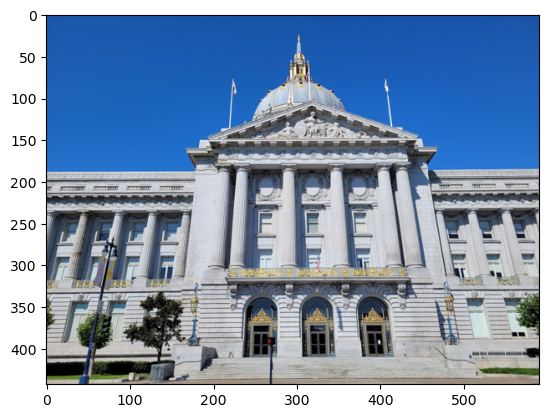

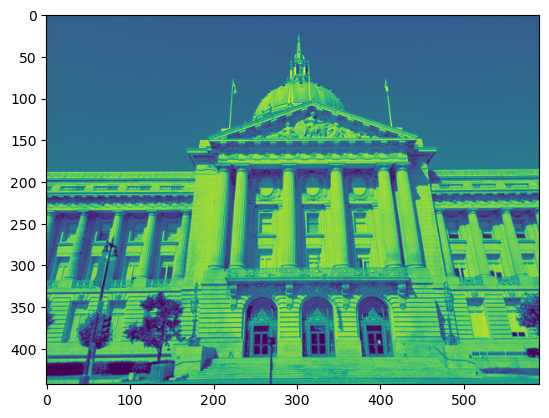

In [182]:
# name = "p2_4" 
name = "p2_0" 

im=Image.open("data_p2/{}.jpg".format(name)) 
im = im.resize([int(im.size[0]/4),int(im.size[1]/4)])

plt.figure()
plt.imshow(im)

# convert to grayscale, rescale intensities to [0,1]
gray = np.asarray(im.convert('L'))
gray = gray/255.0
print(gray)
plt.figure()
plt.imshow(gray)

(6, 6)


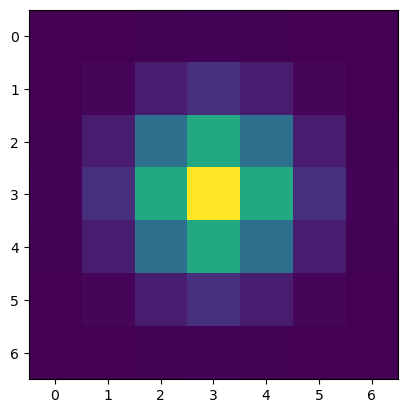

In [183]:
# Harris corner detector

# compute partial derivatives ix, iy at each pixel
gradients = np.gradient(gray)
# print(gradients)
plt.imshow(gradients[0])
ix = gradients[1]
iy = gradients[0]

sigma = 1
w_size = max(7, int(sigma*6))
wx = np.matrix(signal.windows.gaussian(w_size, sigma))
wy = np.matrix(signal.windows.gaussian(w_size, sigma))
w = wx.T*wy
plt.imshow(w)

ix_square = ix**2
ix_y = ix*iy
iy_square = iy**2
# print(ix.shape)
# plt.imshow(iy_square)
alpha =0.05
img_R = np.zeros((gray.shape))
w_half = int(w_size/2)
for i in range(w_half, gray.shape[0]-w_half):
    for j in range(w_half, gray.shape[1]-w_half):
        A = np.sum(ix_square[i-w_half:i+w_half+1,j-w_half:j+w_half+1]*w)
        B = np.sum(iy_square[i-w_half:i+w_half+1,j-w_half:j+w_half+1]*w)
        C = np.sum(ix_y[i-w_half:i+w_half+1, j-w_half:j+w_half+1]*w)
        M = np.asarray([[A,C],[C,B]])
        det = A*B-(C**2)
        tr = A+B
        R = det - alpha * (tr**2)
        img_R[i,j] = R

print(ix_square[i-w_half:i+w_half,j-w_half:j+w_half].shape)

3.883866647405648


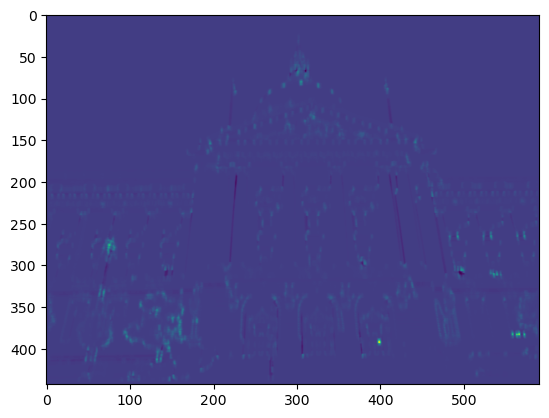

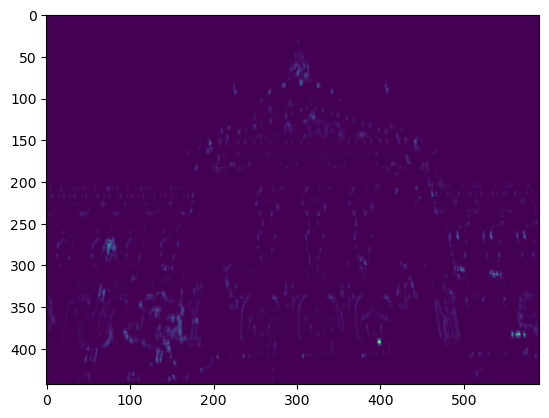

In [200]:
from numpy import unravel_index
plt.imshow(img_R)
print(img_R[unravel_index(img_R.argmax(), img_R.shape)])
greatest = img_R.max()
threshold = 0
img_thr = np.where(img_R > threshold, img_R, 0)
plt.figure()
plt.imshow(img_thr)

In [201]:
def display_corners(image, coords, title="Corners detected"):
 plt.imshow(image, cmap='gray')
 plt.title(title)
 plt.plot(coords[:, 1], coords[:, 0], 'o', markersize=1, c='r')
 

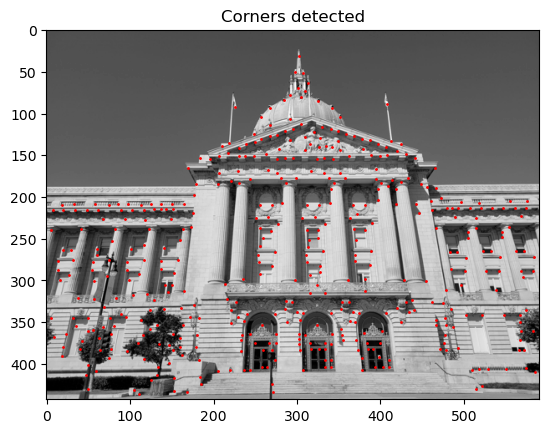

In [205]:
from skimage.feature import corner_peaks,corner_harris
measure_image = corner_harris(gray)
coords = corner_peaks(img_thr, min_distance=5, threshold_rel=0.02)
display_corners(gray, coords)

In [203]:
# from skimage.feature import corner_peaks,corner_harris
# measure_image = corner_harris(gray)
# coords = corner_peaks(measure_image, min_distance=3, threshold_rel=0.02)
# display_corners(gray, coords)